# Calculate distance tutorial

Tutorial presents use cases of euclidean distance function. It is designed to explain theory, algorithm and data structures related to this method.

Scope of the notebook:
* One dimensional array / <span style="color:pink">Practice</span>
* Two dimensional matrix / <span style="color:pink">Practice</span>
* Three dimensional matrices / <span style="color:pink">Practice</span>
* Points in n-dimensional space / <span style="color:pink">Practice</span>
* Data limits / <span style="color:pink">Practice</span>
* Mathematical assumptions / <span style="color:green">Theory</span>
* Algorithm and numpy functions behind it / <span style="color:green">Theory</span>

In [1]:
# Import libraries for the data preparation (numpy) and visualizations (matplotlib). Import reviewed function.

%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from helper_functions.euclidean_distance import calculate_distance as distance

## One dimensional array: distances between all points

One dimensional arrays are usually signals coming from different sources and their position usually represents time, e.g.: temperature readings day by day, voltage measurements in circuit, traffic in the website or number of customers in the shop by hour by year. In some cases a dimension represents spatial units: the force streatching steel line in each point. To make this tutorial more readable we will use "real world" signals.

### Signal description

Signal used in this tutorial comes from the standard: Cardiac monitors, heart rate meters, and alarms [American National Standard (ANSI/AAMI EC13:2002)]. Arlington, VA: Association for the Advancement of Medical Instrumentation, 2002. Data is retrieved from PhysioNet database: Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals. Circulation 101(23):e215-e220 [Circulation Electronic Pages; http://circ.ahajournals.org/content/101/23/e215.full]; 2000 (June 13).

Data represents ECG signal and it is sampled at rate of 720 samples per second (720Hz).

In [2]:
# Signal

signal = np.fromfile(os.getcwd() + '/tutorials/datasets/aami3a.dat', dtype=float)[:720]
time_array = np.arange(start=0, stop=1, step=1/len(signal))

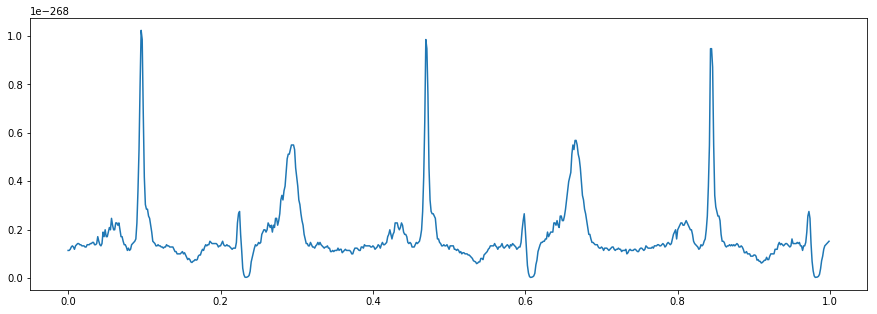

In [3]:
plt.figure(figsize=(15,5))
plt.plot(time_array, signal)

In [4]:
# Calculate distance: column with "distances" should be passed into this function

d = distance(time_array)

Distance represents one dimensional array. It is easy to test if our function works well - the first row of output matrix should be the same as our points array minus the first value of points array. Why? Because each row of output array represents distances from each point to the other points where each column represents position of specific point. 

In [5]:
time_array[:10]  ## input distance

array([ 0.        ,  0.00138889,  0.00277778,  0.00416667,  0.00555556,
        0.00694444,  0.00833333,  0.00972222,  0.01111111,  0.0125    ])

In [6]:
d[0][:10]  ## output distances

array([ 0.        ,  0.00138889,  0.00277778,  0.00416667,  0.00555556,
        0.00694444,  0.00833333,  0.00972222,  0.01111111,  0.0125    ])

In [7]:
(time_array - time_array[0])[:10]  ## input distance minus the first measurement

array([ 0.        ,  0.00138889,  0.00277778,  0.00416667,  0.00555556,
        0.00694444,  0.00833333,  0.00972222,  0.01111111,  0.0125    ])

## Two dimensional array: distances between points located on the Earth's surface

If you want to measure acidity (pH) of soil in a corn field you take few dozens of samples from different locations inside your study area and interpolate missing measurements from them. Each point has specific address: latitude and longitude or x and y on the cartesian plane. If you want to perform interpolation of a soil acidity in positions where you didn't take samples then you should know distances between your points. You may even assume that the value in unknown location is the sum other values divided by distance to them.

It works like the Coulomb's law known from physics but example of this rule will be presented in different tutorial. I'll show here how does function work with the two-dimensional data.

In [8]:
# Point locations

number_of_points = 5
loc_x = np.random.randint(0, high=20, size=(number_of_points,))
loc_y = np.random.randint(0, high=20, size=(number_of_points,))
vals = np.random.random_sample(size=(number_of_points,))

field_measurements = np.array([loc_x, loc_y, vals])
field_measurements = field_measurements.T

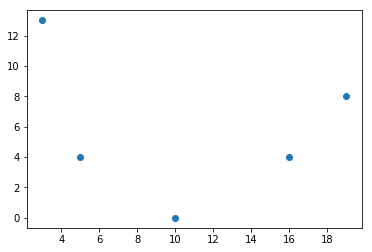

In [9]:
plt.scatter(field_measurements[:, 0], field_measurements[:, 1])

In [10]:
d = distance(field_measurements[:, :-1])

In [11]:
d

array([[  0.        ,   6.40312424,   9.21954446,  11.        ,
         14.56021978],
       [  6.40312424,   0.        ,  14.76482306,   7.21110255,
         12.04159458],
       [  9.21954446,  14.76482306,   0.        ,  15.8113883 ,
         16.76305461],
       [ 11.        ,   7.21110255,  15.8113883 ,   0.        ,   5.        ],
       [ 14.56021978,  12.04159458,  16.76305461,   5.        ,   0.        ]])

In [12]:
field_measurements[:, :-1]

array([[  5.,   4.],
       [ 10.,   0.],
       [  3.,  13.],
       [ 16.,   4.],
       [ 19.,   8.]])

## Three dimensional matrix: points cloud

Moving from 2D into 3D from mathematical point of view is simple: we just adding a new column to our array which indicates "z" dimension. It could be depth or elevation or time in a real world application. If sampling of two-dimensional area may be expensive then the new dimension multiplies this cost. Sometimes by very large factor if you must perform drills to obtain geological samples from different depths over big area.

In [13]:
# Preparation of data

number_of_points = 25
depth = np.random.randint(-80, 0, size=(number_of_points,))
loc_x = np.random.randint(-10, 10, size=(number_of_points,))
loc_y = np.random.randint(-10, 10, size=(number_of_points,))
vals = np.random.random_sample(size=(number_of_points,))

matrix3D = np.array([loc_x, loc_y, depth, vals])
matrix3D = matrix3D.T

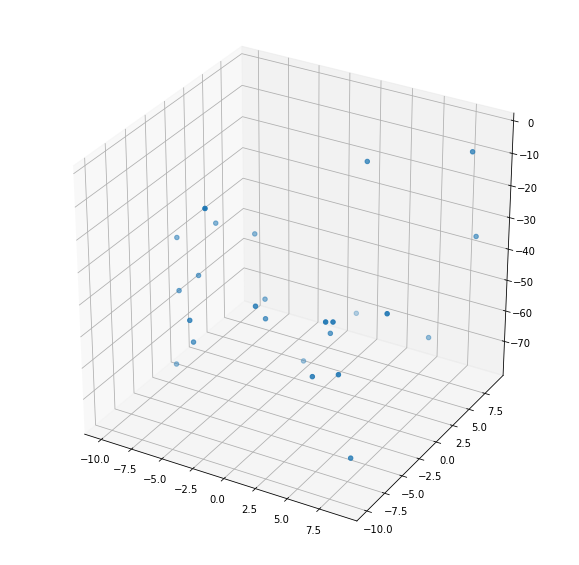

In [14]:
# Figure

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=matrix3D[:, 0], ys=matrix3D[:, 1], zs=matrix3D[:, 2])

In [15]:
# Distance

d = distance(matrix3D[:, :-1])
d[0]

array([  0.        ,  17.97220076,   2.23606798,  15.77973384,
        35.84689666,  40.91454509,  18.68154169,  41.97618372,
        17.34935157,   4.12310563,  13.07669683,  16.0623784 ,
        15.06651917,  15.32970972,  16.40121947,  38.06573262,
        43.9089968 ,  32.34192326,  16.1245155 ,  32.15587038,
         6.32455532,  28.94822965,  21.9544984 ,  23.74868417,  12.36931688])

## The last practical example: n-dimensional data set. 

Sometimes data has more than 3 dimensions and you still need some metrics to calculate a distance between each point of data. Usually the dimensionality should be reduced but even with smaller number of the data dimensions their count may exceed 3.

If you have a machine learning system for average rate prediction you should include many features such as: size of flat (1st Dim.), number of rooms (2nd Dim.), distance to the shops (3rd Dim.), distance to the nearest museum (4th Dim.) ... etc.

I will create here big numpy array with 100 features and only 5 samples to calculate distance between them.

In [32]:
number_of_points = 100
feature_matrix = np.random.random_sample(size=(5, number_of_points))
feature_matrix

array([[ 0.0304198 ,  0.0633969 ,  0.62220768,  0.1913758 ,  0.89595096,
         0.28716114,  0.78208393,  0.51333873,  0.95404301,  0.29272429,
         0.82340776,  0.02289071,  0.79525376,  0.58076846,  0.66009252,
         0.88565233,  0.02893218,  0.3030064 ,  0.52495701,  0.81880409,
         0.40224972,  0.88549332,  0.10528428,  0.9739793 ,  0.85968144,
         0.14857125,  0.5669268 ,  0.72469899,  0.44235822,  0.37946231,
         0.41692714,  0.74255633,  0.41005785,  0.36016143,  0.93103376,
         0.25455333,  0.9083592 ,  0.4682344 ,  0.46454903,  0.60676035,
         0.14565068,  0.9300948 ,  0.801861  ,  0.19218311,  0.71307716,
         0.99002397,  0.49141497,  0.47836526,  0.72316362,  0.50378454,
         0.28528559,  0.04181806,  0.24289622,  0.77994498,  0.94178348,
         0.59384956,  0.92035463,  0.21794187,  0.91721191,  0.24082156,
         0.86820658,  0.73303151,  0.58044298,  0.36438914,  0.50056995,
         0.40551669,  0.83496081,  0.75773762,  0.4

In [33]:
d = distance(feature_matrix)

In [34]:
d[0]

array([ 0.        ,  3.85904316,  3.94015919,  3.9732832 ,  3.9099872 ])

In [35]:
d

array([[ 0.        ,  3.85904316,  3.94015919,  3.9732832 ,  3.9099872 ],
       [ 3.85904316,  0.        ,  3.91671389,  4.2894183 ,  4.20591479],
       [ 3.94015919,  3.91671389,  0.        ,  3.72783494,  3.85910533],
       [ 3.9732832 ,  4.2894183 ,  3.72783494,  0.        ,  3.70939964],
       [ 3.9099872 ,  4.20591479,  3.85910533,  3.70939964,  0.        ]])

## Data Limits

Actually algorithm has a hardcoded data size limits due to the memory management. It can take only 5000 samples. If it is a serious issue then in the future I will enhance method to work on the bigger datasets.

In [44]:
number_of_samples = 5001
dimensions = 3
data_above_a_limit = np.random.randint(low=0, high=100, size=(number_of_samples, dimensions))

In [45]:
d = distance(data_above_a_limit)

ValueError: Please provide array with less than 5000 elements

In [46]:
number_of_samples = 5000
dimensions = 9
data_above_a_limit = np.random.randint(low=0, high=100, size=(number_of_samples, dimensions))

In [47]:
d = distance(data_above_a_limit)

In [48]:
d[0]

array([   0.        ,  132.15521178,  127.40486647, ...,   64.35060217,
         93.8562731 ,   96.42095208])

## Mathematical backgorund

### Calculate distance between all coordinates

\begin{align}
d(\vec{\mathbf{p}}, \vec{\mathbf{q}}) & = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + ... + (q_i - p_i)^2 + ... + (q_n - p_n)^2}
\end{align}

where:
* $d(\vec{\mathbf{p}}, \vec{\mathbf{q}})$- distance between coordinates p and q

In the simplest form with one dimension equation takes form:

\begin{align}
d(\mathbf{p}, \mathbf{q}) & = \sqrt{(q - p)^2} = |q - p|
\end{align}

## Algorithm